In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install folium
!pip install scikit-learn
!pip install colorcet
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns


import colorcet as cc

import folium
from folium.plugins import HeatMap
from matplotlib import pyplot as plt


sns.set_theme()

In [3]:
# Exercise 1
# Load the dataframe

# crimes_data_15052018_15052023 = pd.read_csv('/content/drive/MyDrive/DATA_ANALISIS/Crimes_-_2001_to_Present.csv')
crimes_data_15052018_15052023 = pd.read_csv('/home/msf/Downloads/Crimes_-_2001_to_Present.csv')

In [4]:
crimes_data_15052018_15052023.sample(10).T

370831  \
ID                                         11839311   
Case Number                                JC445378   
Date                         09/23/2019 03:30:00 PM   
Block                           047XX N WESTERN AVE   
IUCR                                           0870   
Primary Type                                  THEFT   
Description                          POCKET-PICKING   
Location Description                        CTA BUS   
Arrest                                        False   
Domestic                                      False   
Beat                                           1911   
District                                         19   
Ward                                           40.0   
Community Area                                  4.0   
FBI Code                                         06   
X Coordinate                              1159516.0   
Y Coordinate                              1931305.0   
Year                                           2019   
Updated On                   09/30/2019 04:16:28 PM   
Latitude                                  41.967223   
Longitude                                -87.688861   
Location              (41.967222694, -87.688861224)   

                                                               227718  \
ID                                                           11628820   
Case Number                                                  JC191810   
Date                                           03/19/2019 04:47:00 PM   
Block                                              057XX S CICERO AVE   
IUCR                                                             1478   
Primary Type                        CONCEALED CARRY LICENSE VIOLATION   
Description                                         PROHIBITED PLACES   
Location Description  AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA   
Arrest                                                           True   
Domestic                                                        False   
Beat                                                              813   
District                                                            8   
Ward                                                             23.0   
Community Area                                                   56.0   
FBI Code                                                           15   
X Coordinate                                                1145654.0   
Y Coordinate                                                1866253.0   
Year                                                             2019   
Updated On                                     03/26/2019 04:15:20 PM   
Latitude                                                    41.788987   
Longitude                                                   -87.74148   
Location                                 (41.788987036, -87.74147999)   

                                             209598  \
ID                                         11602734   
Case Number                                JC160785   
Date                         02/19/2019 01:00:00 PM   
Block                        055XX S CHRISTIANA AVE   
IUCR                                           0810   
Primary Type                                  THEFT   
Description                               OVER $500   
Location Description                 CLEANING STORE   
Arrest                                        False   
Domestic                                      False   
Beat                                            822   
District                                          8   
Ward                                           14.0   
Community Area                                 63.0   
FBI Code                                         06   
X Coordinate                              1154987.0   
Y Coordinate                              1867784.0   
Year                                           2019   
Updated On                   02/26/2019 04:14:42 PM   

<AxesSubplot:xlabel='Primary Type'>

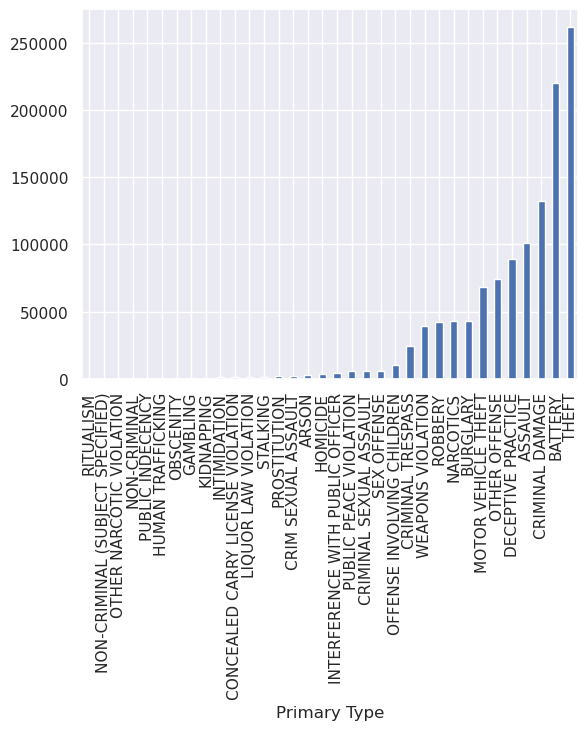

In [5]:
# we check the amount of different types of crimes

crimes_data_15052018_15052023.groupby('Primary Type').count()['ID'].sort_values().plot(kind='bar')

In [6]:
crimes_by_geolocation = crimes_data_15052018_15052023.groupby(['Latitude', 'Longitude']).count()['ID'].reset_index()

In [7]:
crimes_by_geolocation['weight'] = 0.5
crimes_by_geolocation_sampled = crimes_by_geolocation.sample(112098)

In [8]:
# Plot the total amount of crimes (normalized)

def generateBaseMap(loc, zoom=11, tiles='OpenStreetMap', crs='ESPG2263'):
    return folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   width=800,height=800,
                   tiles=tiles)
f = folium.Figure(width=800, height=800)
base_map = generateBaseMap([crimes_by_geolocation_sampled['Latitude'].median(), crimes_by_geolocation_sampled['Longitude'].median()] ).add_to(f)

data = crimes_by_geolocation_sampled.drop(columns=['ID']).values.tolist()
           
hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.75,
                radius=10)

base_map.add_child(hm)

In [9]:
# Plot the total amount of thefts (normalized)
# We can see that the distribution of thefts is different as the general crimes, there is a focus on certain areas.

crimes_by_geolocation_THIEF = crimes_data_15052018_15052023[crimes_data_15052018_15052023['Primary Type'] == 'THEFT'].groupby(['Latitude', 'Longitude']).count()['ID'].reset_index()
crimes_by_geolocation_THIEF['weight'] = .5

f = folium.Figure(width=800, height=800)
base_map = generateBaseMap([crimes_by_geolocation_THIEF['Latitude'].median(), crimes_by_geolocation_THIEF['Longitude'].median()] ).add_to(f)

data = crimes_by_geolocation_THIEF.drop(columns=['ID']).values.tolist()
           
hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.75,
                radius=10)

base_map.add_child(hm)

In [10]:
# We are going to predict only based on THEFT data

thief_data =  crimes_data_15052018_15052023[crimes_data_15052018_15052023['Primary Type'] == 'THEFT']

<AxesSubplot:xlabel='Description'>

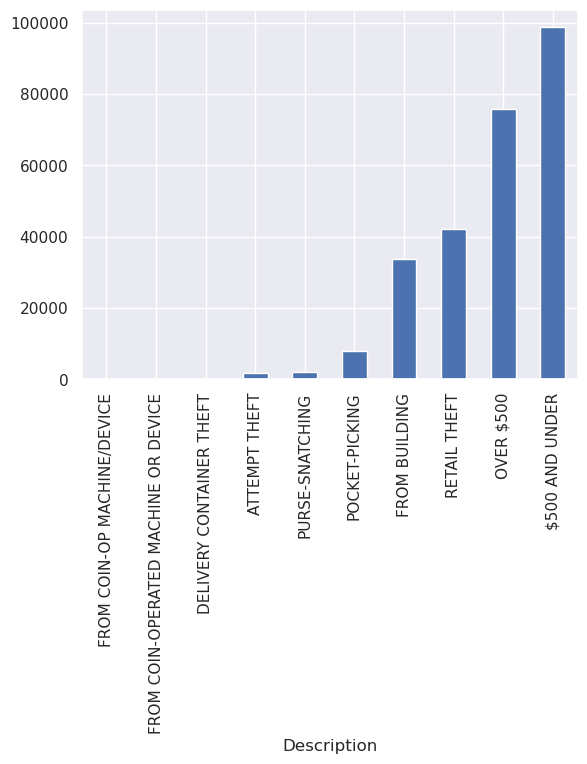

In [11]:
thief_data.groupby('Description').count()['ID'].sort_values().plot(kind='bar')

In [12]:
#super simple data engineering

crimes_data_15052018_15052023['Date'] = pd.to_datetime(crimes_data_15052018_15052023['Date'], format='%m/%d/%Y %I:%M:%S %p')

crimes_data_15052018_15052023['dow'] = crimes_data_15052018_15052023['Date'].dt.dayofweek
crimes_data_15052018_15052023['month'] = crimes_data_15052018_15052023['Date'].dt.month
crimes_data_15052018_15052023['year'] = crimes_data_15052018_15052023['Date'].dt.year
crimes_data_15052018_15052023['day'] = crimes_data_15052018_15052023['Date'].dt.day

# I create a season variable.
crimes_data_15052018_15052023['season'] = crimes_data_15052018_15052023['Date'].dt.month%12 // 3 + 1

dataset_mask = crimes_data_15052018_15052023['Primary Type'] == 'THEFT'

crimes_data_15052018_15052023['Target'] = np.where(dataset_mask, 1, 0)
crimes_data_15052018_15052023['Domestic'] = crimes_data_15052018_15052023.Domestic.astype(int)

In [13]:
crimes_data_15052018_15052023.Target.value_counts()

0    924686
1    262400
Name: Target, dtype: int64

/tmp/ipykernel_35390/2867535419.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crimes_data_15052018_15052023[['Date', 'Location Description', 'Domestic', 'Beat', 'Ward', 'Community Area', 'Year', 'dow', 'month', 'day', 'season', 'Target']].corr()


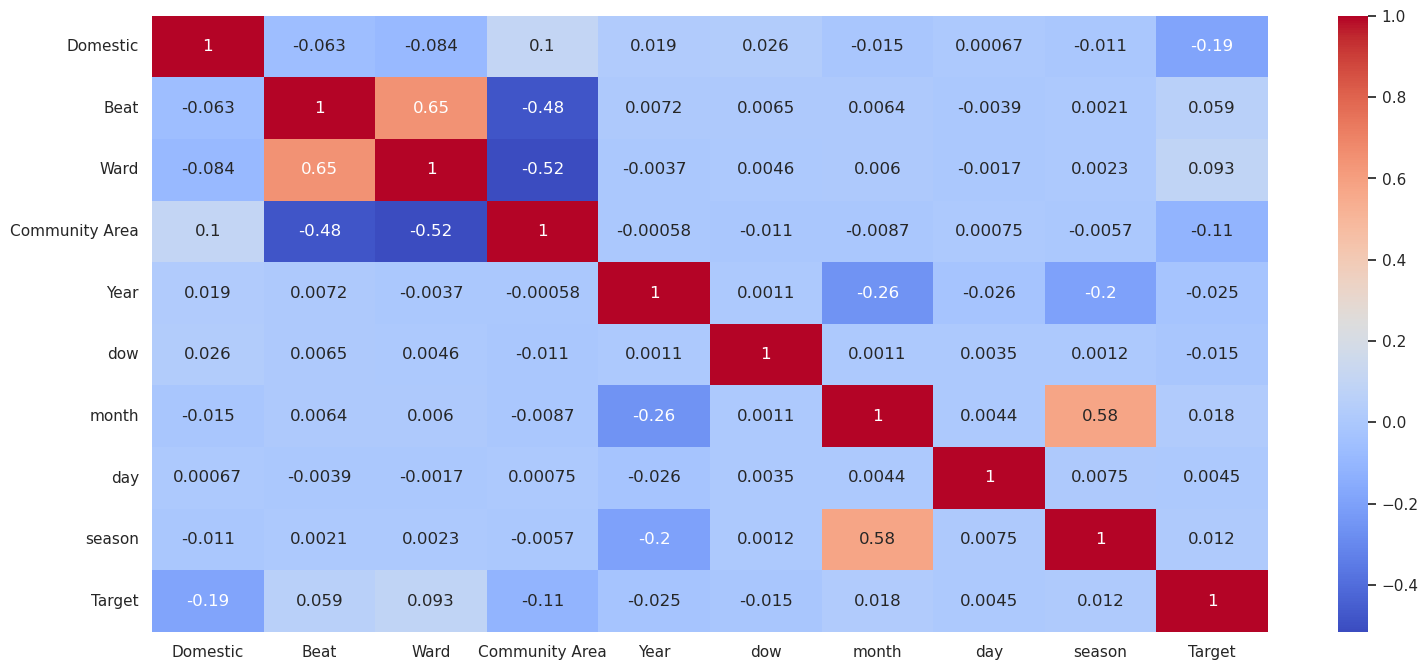

In [14]:
# deleted some variables with high correlation

correlation_matrix = crimes_data_15052018_15052023[['Date', 'Location Description', 'Domestic', 'Beat', 'Ward', 'Community Area', 'Year', 'dow', 'month', 'day', 'season', 'Target']].corr()


plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# dropped nan values, because in total where around 6k

crimes_data_cleaned = crimes_data_15052018_15052023[['Date', 'Location Description', 'Domestic', 'Beat', 'Ward', 'Community Area', 'Year', 'dow', 'month', 'day', 'season', 'Target']].dropna()

# most likely places to be a victim of crime
most_average_places = crimes_data_cleaned['Location Description'].value_counts()[crimes_data_cleaned['Location Description'].value_counts() >= 100]
crimes_data_cleaned = crimes_data_cleaned[crimes_data_cleaned['Location Description'].isin(most_average_places.reset_index()['index'].tolist())]

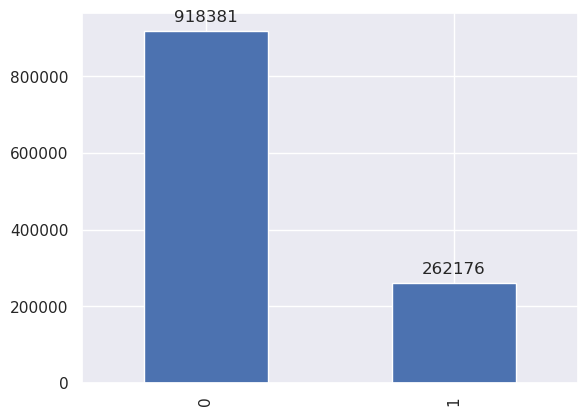

In [16]:
# plot to check if the data is unbalanced

ax = crimes_data_cleaned.Target.value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [17]:
# balancing dataframe

balanced_data = crimes_data_cleaned[crimes_data_cleaned['Target'] == 1].append([crimes_data_cleaned[crimes_data_cleaned['Target'] == 0].sample(crimes_data_cleaned[crimes_data_cleaned['Target'] == 1].shape[0])])

/tmp/ipykernel_35390/3517676247.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = crimes_data_cleaned[crimes_data_cleaned['Target'] == 1].append([crimes_data_cleaned[crimes_data_cleaned['Target'] == 0].sample(crimes_data_cleaned[crimes_data_cleaned['Target'] == 1].shape[0])])


In [18]:
balanced_data.shape

(524352, 12)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'pet' column
balanced_data['Location_Description_encoded'] = le.fit_transform(balanced_data['Location Description'])
balanced_data = balanced_data.drop(columns=['Location Description', 'Date'])


crimes_data_cleaned['Location_Description_encoded'] = le.fit_transform(crimes_data_cleaned['Location Description'])
crimes_data_cleaned = crimes_data_cleaned.drop(columns=['Location Description', 'Date'])

Root Mean Squared Error: 0.6929469748310415
Accuracy:  0.519824490072508


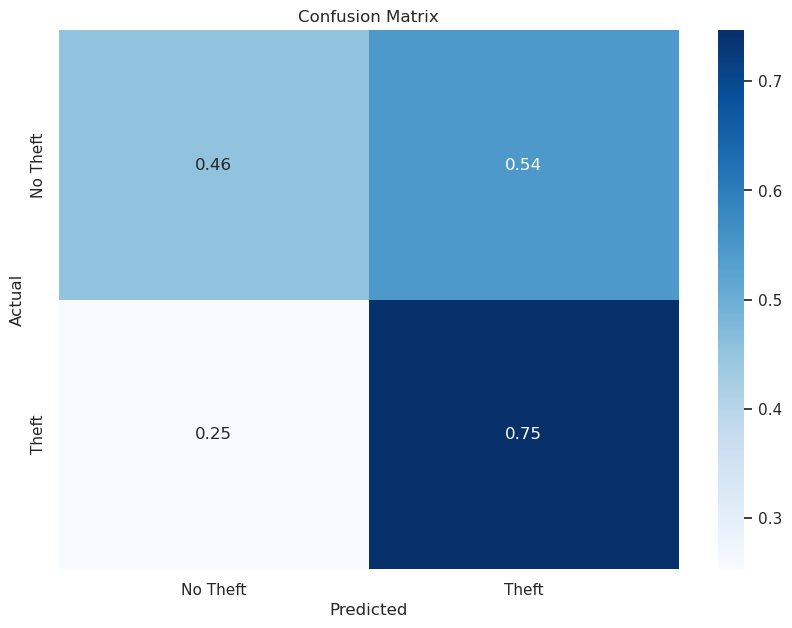

In [20]:
# I am going to use the logistic regression as a baseline of other models.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error


random_state = 42

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(balanced_data.drop(columns=['Target']), balanced_data.Target, test_size = 0.25, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(crimes_data_cleaned.drop(columns=['Target']), crimes_data_cleaned.Target, test_size = 0.25, random_state=random_state)


# Create a logistic regression object
reg = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=random_state)

# Fit the model on the training data
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)

threshold = .5

# Compute and print RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: {}".format(rmse))

classes_pred = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test, classes_pred)
print("Accuracy: ", accuracy)


cf_matrix = confusion_matrix(y_test, classes_pred)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix_normalized, annot=True, cmap='Blues', xticklabels=['No Theft', 'Theft'], yticklabels=['No Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

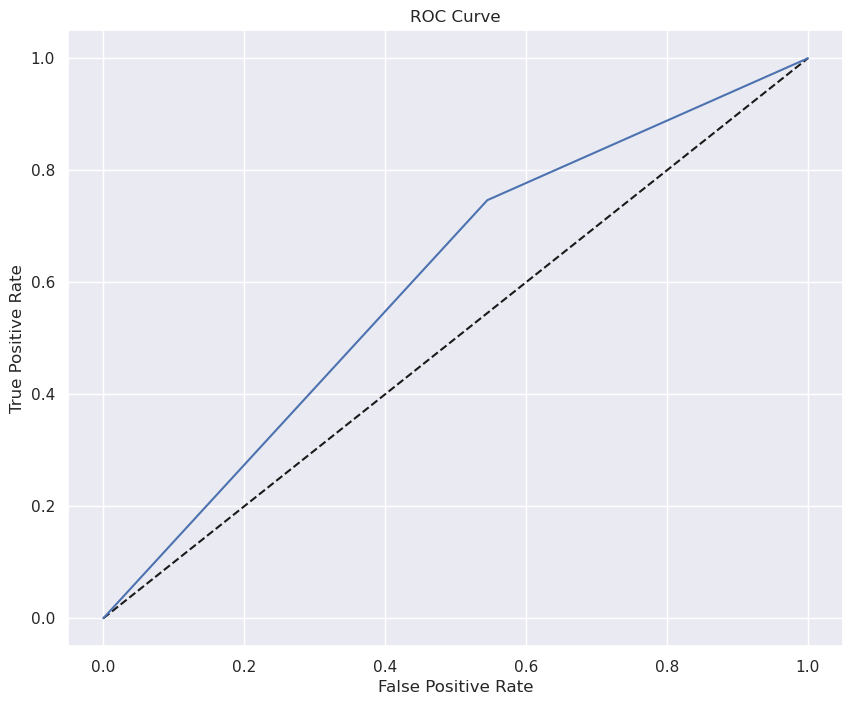

AUC:  0.6007877203034189


In [21]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve

plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred))


# I can see that the ROC curve is not very good and even that I tried to use the balance of classes, didnt affect too much
# The crimes that are no theft are getting predicted poorly 

 - Feature 0: -1.6878111389697585
 - Feature 1: -7.90229505759437e-05
 - Feature 2: 0.007873949956799502
 - Feature 3: -0.009387348559539386
 - Feature 4: 0.00017265807522624894
 - Feature 5: -0.014803425807393389
 - Feature 6: 0.012909317812649364
 - Feature 7: 0.0014260866464031567
 - Feature 8: -0.014653733981324715
 - Feature 9: 0.0006184795286787942


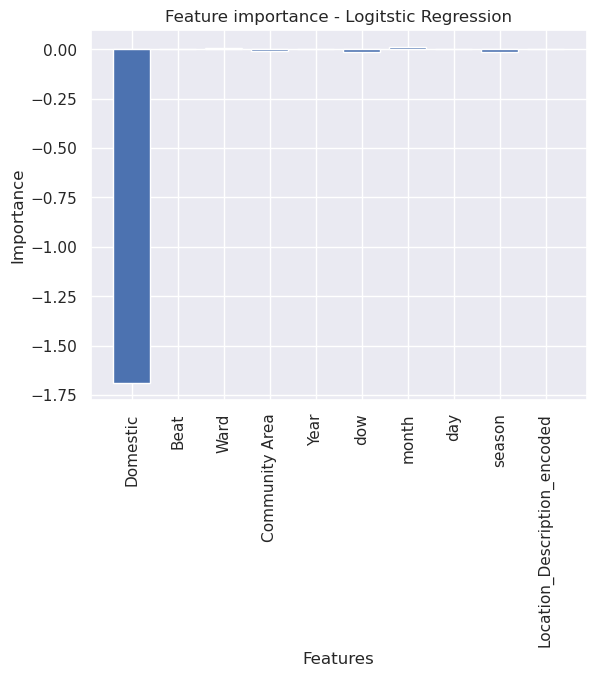

In [22]:
# Now I plot the importance of the variables for the logitstic regression, we can see that the model 
# is only using one variable mostly.

importance = reg.coef_

# Summarize feature importance
for i, c in enumerate(importance):
  for j, coef in enumerate(c):
    print(f" - Feature {j}: {coef}")

# Plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance - Logitstic Regression')
plt.xticks(ticks=range(len(balanced_data.drop(columns=['Target']).columns)), labels=balanced_data.drop(columns=['Target']).columns, rotation=90)
plt.show()

In [23]:
# Now I am going to create a randomforest model to check how much the perfomance 
# Could improve. At the start we develop a Random Search through a number of parameters
# Then we stay with the best parameter.


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier( class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=param_grid,
                           n_iter=5, cv=3,
                           scoring='roc_auc', n_jobs=7)

# Fit the GridSearchCV object to the data
# random_search.fit(X_train, y_train)

In [24]:
# Get the best parameters
# best_params = random_search.best_params_
# print("Best parameters: ", best_params)

# Get the best score
# best_score = random_search.best_score_
# print("Best score: ", best_score)

In [25]:
# We develop a model with all the data, based on the best params of random search

rf_1 = RandomForestClassifier(max_depth = 30, n_estimators=100,
                            min_samples_leaf=2, min_samples_split=5,
                            class_weight='balanced',
                            n_jobs=-4)
rf_1.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-4)

In [26]:
# We check our accuracy

rf_1.score(X_test_balanced, y_test_balanced)

0.6813285731722202

Root Mean Squared Error: 0.5645098996720782
Accuracy:  0.6813285731722202


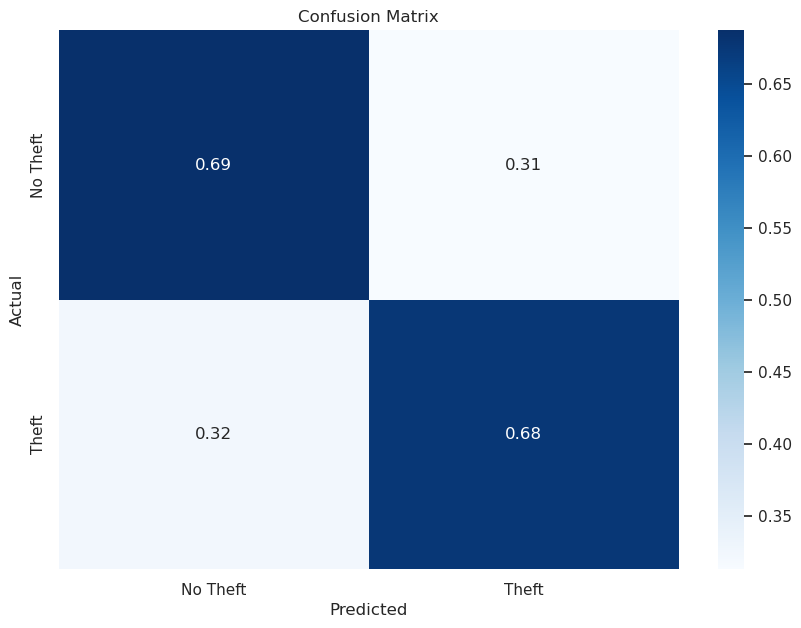

In [27]:
# As we can see this model balance better both clases, further improvements could be done
# Another models could be tried but for time constraints I am going to stick with this.


# Predict on the test data
y_pred = rf_1.predict(X_test_balanced)

threshold = .5

# Compute and print RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test_balanced, y_pred, squared=False)
print("Root Mean Squared Error: {}".format(rmse))

classes_pred = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test_balanced, classes_pred)
print("Accuracy: ", accuracy)


cf_matrix = confusion_matrix(y_test_balanced, classes_pred)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix_normalized, annot=True, cmap='Blues', xticklabels=['No Theft', 'Theft'], yticklabels=['No Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

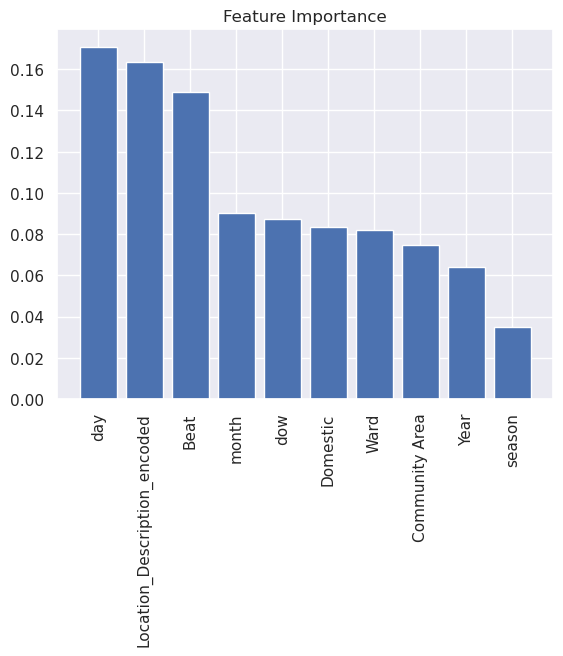

In [28]:
# Calculate feature importances As we can see, all variables play a role in this model,
# that means that all our variables are important (some more than other), and further 
# data engineering could be done to find more variables.

importances = rf_1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [crimes_data_cleaned.drop(columns=['Target']).columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(crimes_data_cleaned.drop(columns=['Target']).shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(crimes_data_cleaned.drop(columns=['Target']).shape[1]), names, rotation=90)

# Show plot
plt.show()

In [29]:
# We save the model using joblib, this allow us to upload the model to GCP directly as well...

from joblib import dump

# dump(rf, '/content/drive/MyDrive/DATA_ANALISIS/model.joblib')
dump(rf_1, '/home/msf/Downloads/model.joblib')

['/home/msf/Downloads/model.joblib']

In [30]:
# Exercise 2

# Now we conduct an analysis over the same dataset but only based on the time series.


thief_data['Date'] = pd.to_datetime(thief_data['Date'])

/tmp/ipykernel_35390/741191423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thief_data['Date'] = pd.to_datetime(thief_data['Date'])


<AxesSubplot:xlabel='Date'>

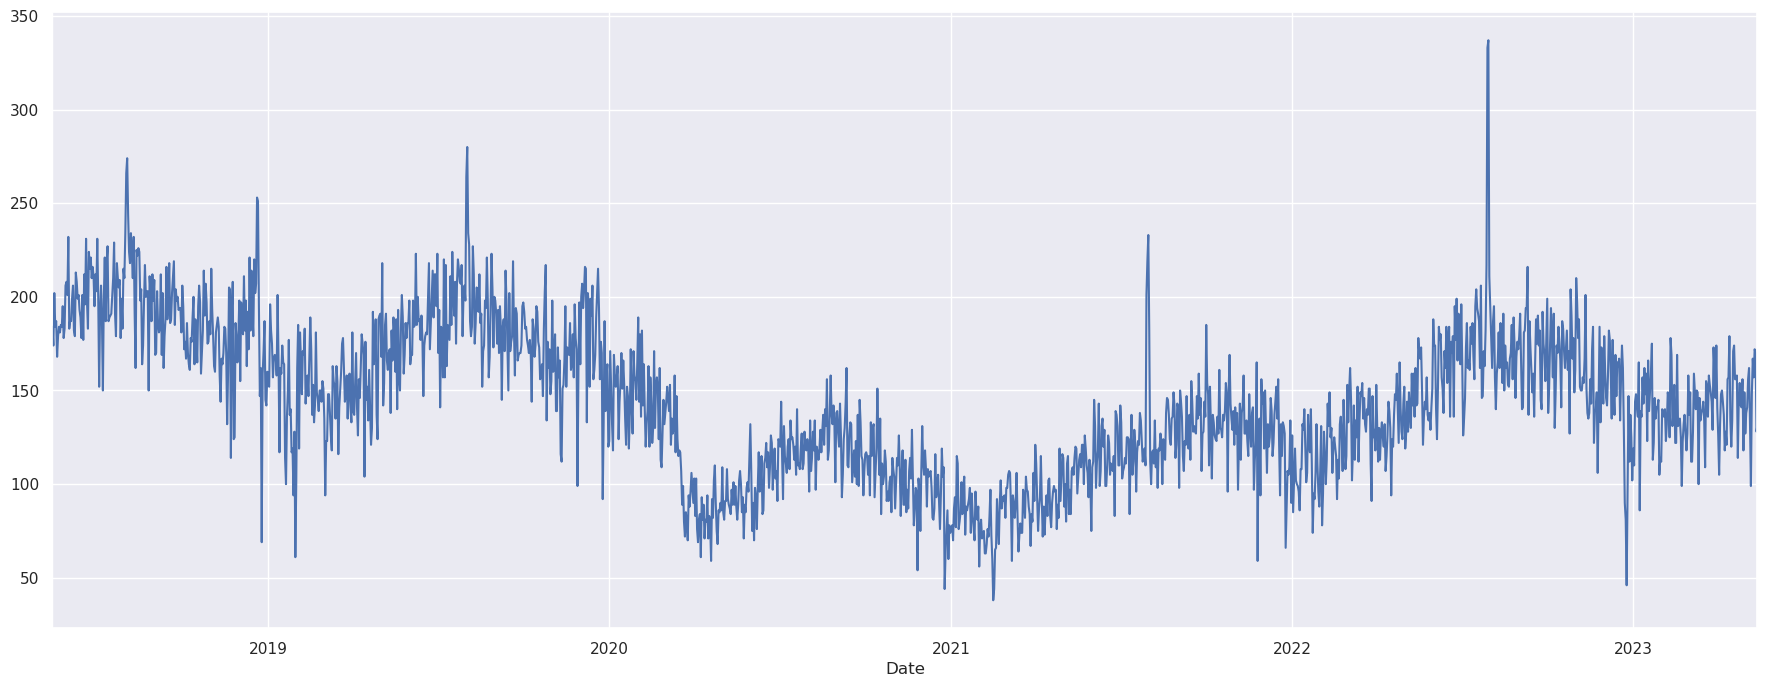

In [31]:
# We plot the original data, as we can see, there is a very abrupt drop in 2020 and 
# that is because of the COVID, we can observe as well some kind of uprising trend (2020 - 2023)
# and a clear seasonality

plt.figure(figsize=(22,8))
temp_df = thief_data.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='D'))["ID"].count().iloc[:-1]
temp_df.plot()

In [32]:
# For the purpose of this analysis I am only going to use data after COVID times

temp_df_without_COVID = temp_df[temp_df.index >= '2021-01-01'] 

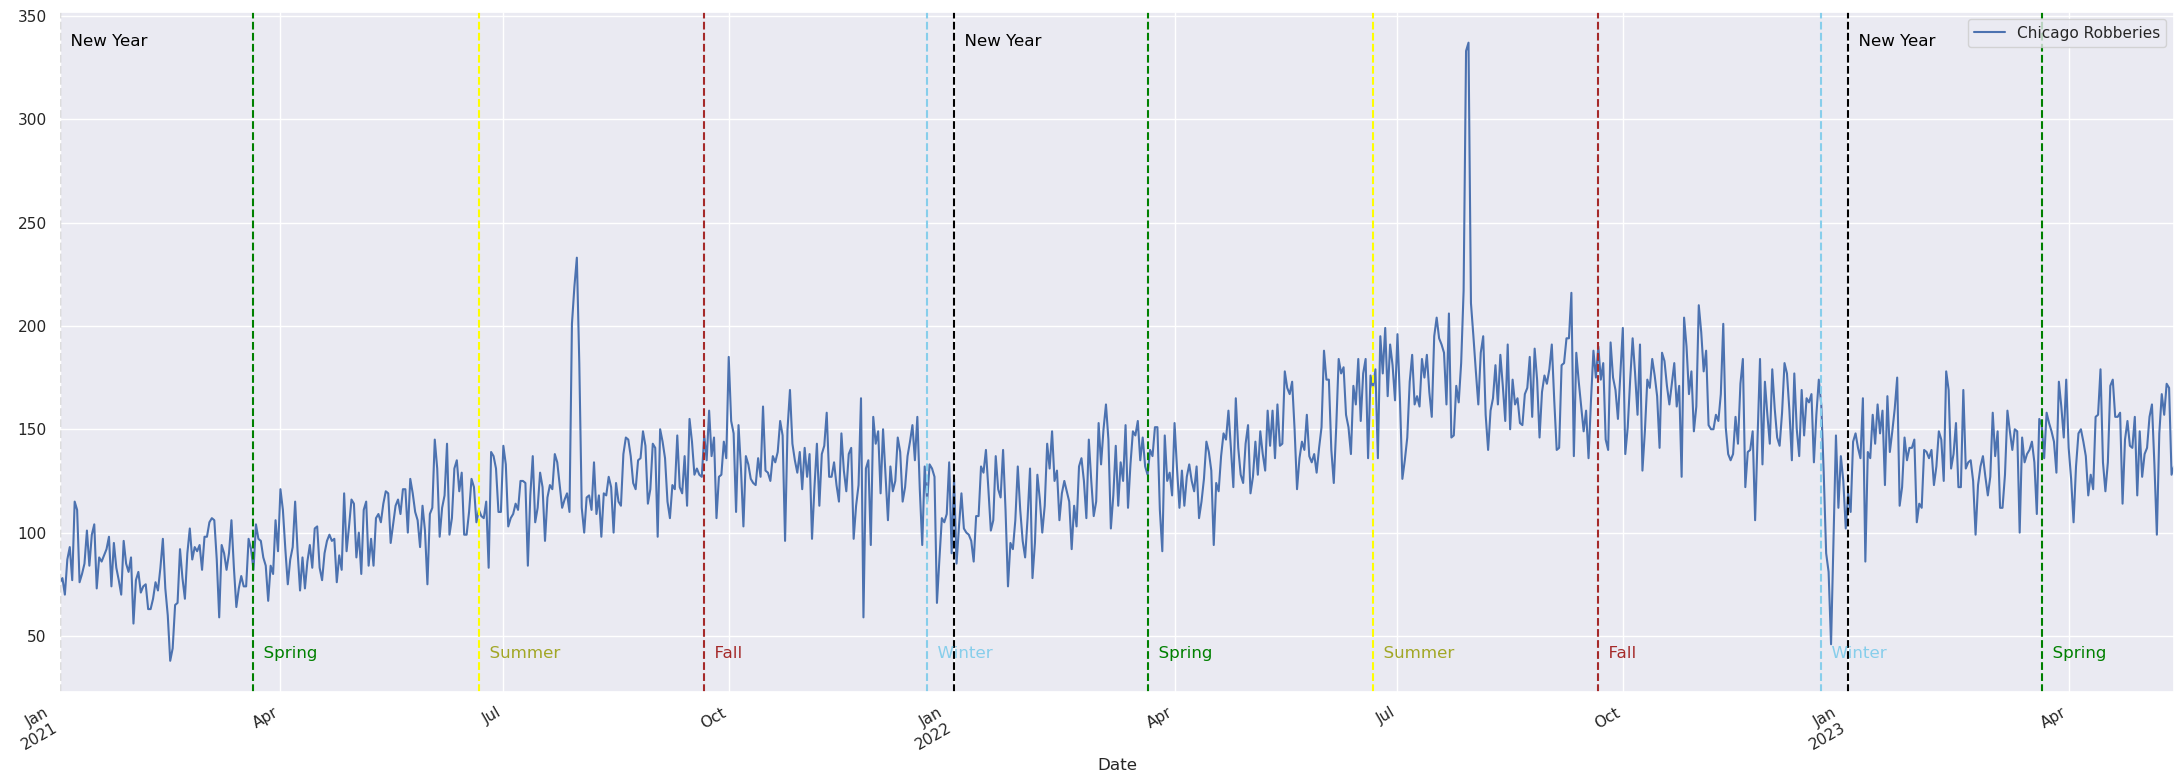

In [33]:
# We can observe the division of the data based on the start of the seasons and 
# the yearly seasonality (we can see an increase in thefts at more warmer climate)


plt.rcParams["figure.figsize"] = [22, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

temp_df_without_COVID.plot(ax=ax)
xcoords = ['2021-01-01', '2022-01-01','2023-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
    ax.text(xc, .95, '  New Year', transform=ax.get_xaxis_transform(), color='black')

# seasons

from datetime import datetime
import matplotlib.dates as mdates

# spring 
xcoords = ['2021-03-21', '2022-03-21', '2023-03-21']
for xc in xcoords:
  ax.axvline(x=xc, color='green', linestyle='--', label='winter')
  ax.text(xc, .05, '  Spring', transform=ax.get_xaxis_transform(), color='green')

# summer 
xcoords = ['2021-06-21', '2022-06-21']
for xc in xcoords:
  plt.axvline(x=xc, color='yellow', linestyle='--')
  ax.text(xc, .05, '  Summer', transform=ax.get_xaxis_transform(), color='#A2A726')

# fall 
xcoords = ['2021-09-21', '2022-09-21']
for xc in xcoords:
  plt.axvline(x=xc, color='brown', linestyle='--')
  ax.text(xc, .05, '  Fall', transform=ax.get_xaxis_transform(), color='brown')

# winter 
xcoords = ['2021-12-21', '2022-12-21']
for xc in xcoords:
  plt.axvline(x=xc, color='skyblue', linestyle='--')
  ax.text(xc, .05, '  Winter', transform=ax.get_xaxis_transform(), color='skyblue')

ax.legend(["Chicago Robberies"])
# plt.legend(loc='upper right')

fig.autofmt_xdate()
plt.show()

In [34]:
# As we suspected the data is nonstationary
# that means that we should transform the time series to make it stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(temp_df_without_COVID.reset_index()['ID'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.988553
p-value: 0.291615


In [35]:
# First we check the components of the time series

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


temp_df_without_COVID = temp_df_without_COVID.reset_index().set_index('Date') 
decompose_result_mult = seasonal_decompose(temp_df_without_COVID['ID'], model="additive")

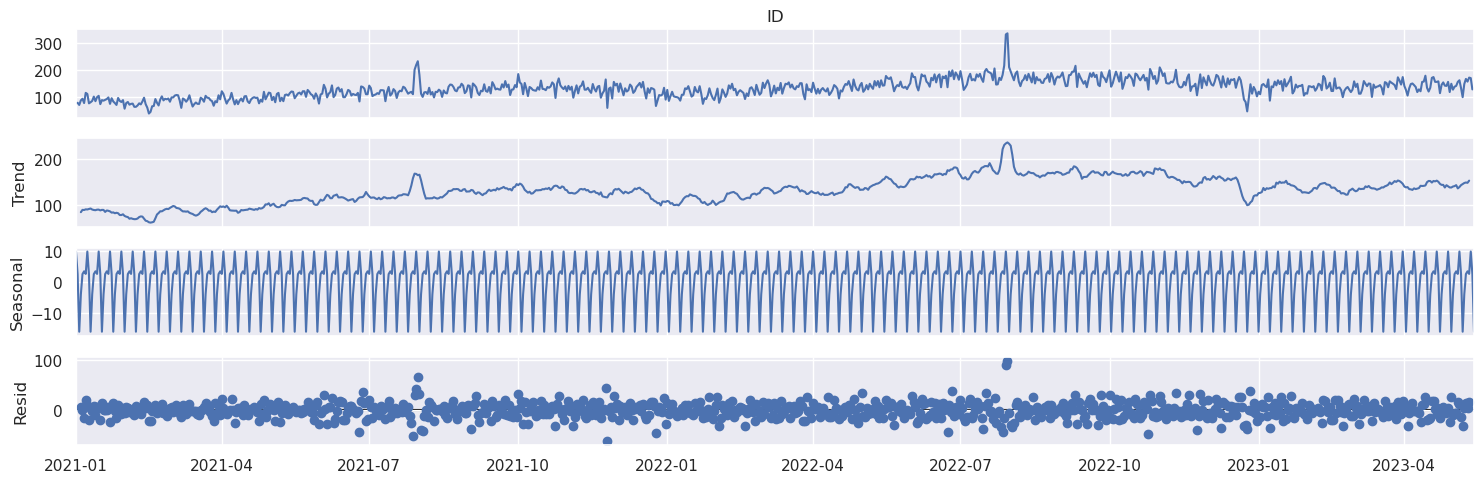

In [36]:
with mpl.rc_context():
  mpl.rc("figure", figsize=(15,5))
  decompose_result_mult.plot();

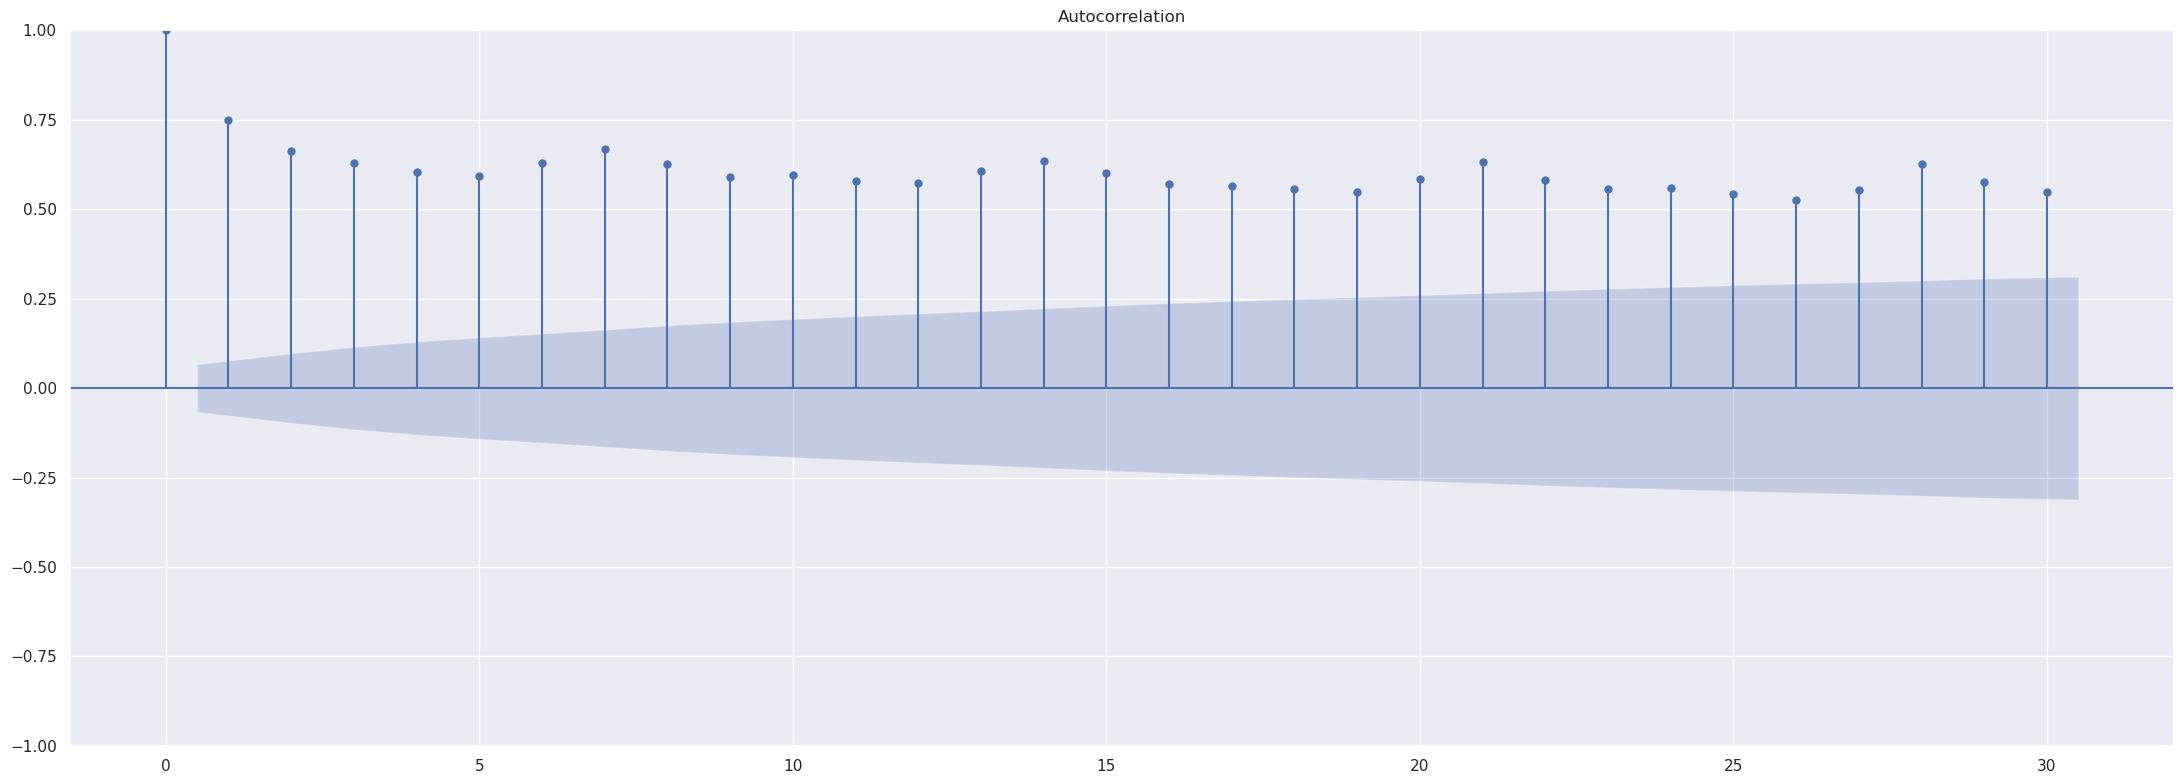

In [37]:
# We try to obtain the seasonality of our data based on autocorrelation analysis,
# But apparently the trend is too strong and is not letting us check the seasonality

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp_df_without_COVID['ID'])
plt.show()

In [38]:
# We are going to apply first order differencing to make this series 
# stationary
from scipy import stats


time_series_diff = temp_df_without_COVID['ID'].diff().dropna()
result = adfuller(time_series_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.919462
p-value: 0.000000


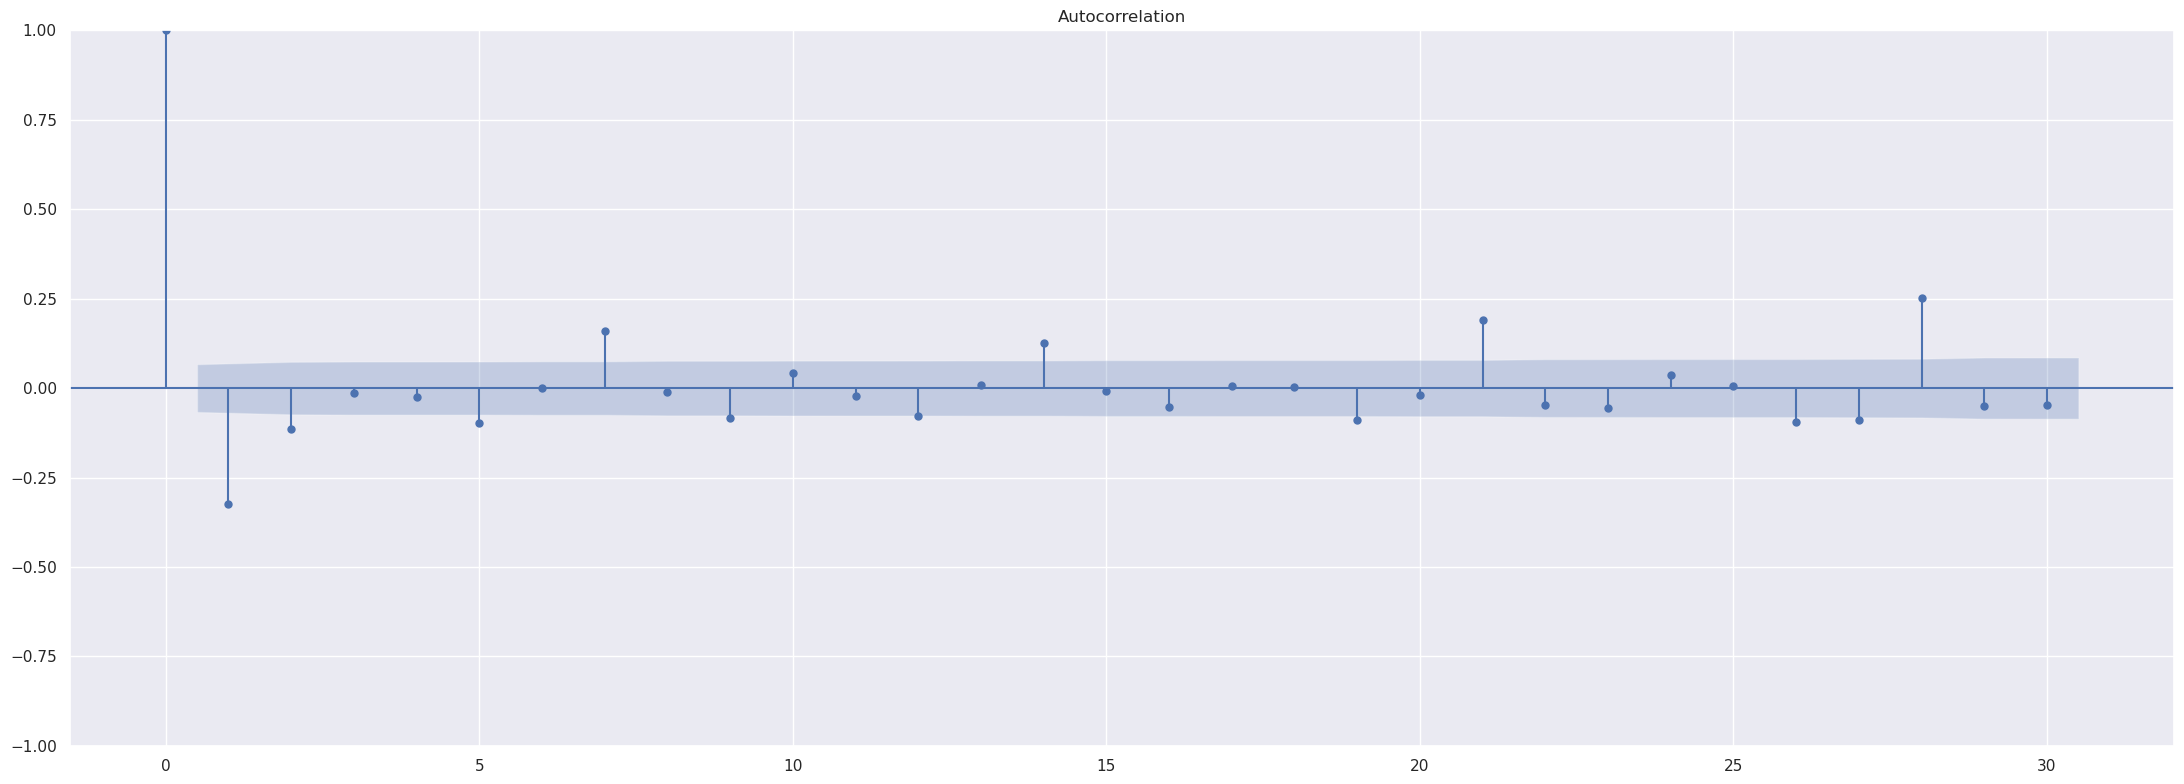

In [39]:
# according to the results, this series now is stationary,
# and we can see a very clear lags of 7 days

plot_acf(time_series_diff)
plt.show()

<AxesSubplot:xlabel='Date'>

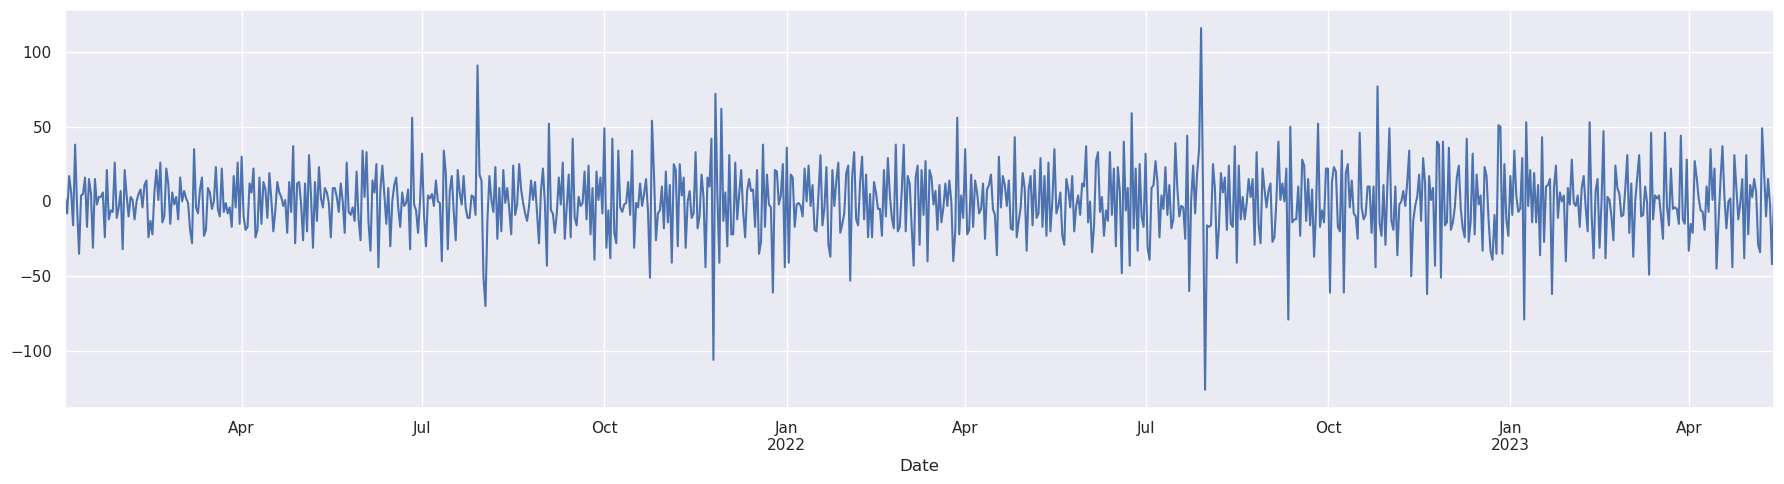

In [40]:
plt.rcParams["figure.figsize"] = [18, 5]
time_series_diff.plot()

In [41]:
# preprocessing 

reseted_time_series =  time_series_diff.reset_index()
reseted_time_series['dow'] = reseted_time_series['Date'].dt.dayofweek
reseted_time_series['month'] = reseted_time_series['Date'].dt.month
reseted_time_series['year'] = reseted_time_series['Date'].dt.year
reseted_time_series['day'] = reseted_time_series['Date'].dt.day
reseted_time_series['season'] = reseted_time_series['Date'].dt.month%12 // 3 + 1


In [42]:
reseted_time_series.set_index('Date').rename(columns={'ID': 'Thefts'})

Thefts  dow  month  year  day  season
Date                                             
2021-01-02     2.0    5      1  2021    2       1
2021-01-03    -8.0    6      1  2021    3       1
2021-01-04    17.0    0      1  2021    4       1
2021-01-05     6.0    1      1  2021    5       1
2021-01-06   -16.0    2      1  2021    6       1
...            ...  ...    ...   ...  ...     ...
2023-05-10   -10.0    2      5  2023   10       2
2023-05-11    15.0    3      5  2023   11       2
2023-05-12    -2.0    4      5  2023   12       2
2023-05-13   -42.0    5      5  2023   13       2
2023-05-14     4.0    6      5  2023   14       2

[863 rows x 6 columns]

In [43]:
# data spliting 

# Define your split points. In this case, we're using 70% for training, 15% for validation, and 15% for testing.
train_size = int(len(reseted_time_series) * 0.75)

# Split the data
train = reseted_time_series.iloc[:train_size]
test = reseted_time_series.iloc[train_size:]

In [44]:
# We check using VAR, which lag order is the best

from statsmodels.tsa.api import VAR
import numpy as np

# Let's create some random data for the example
np.random.seed(666)

# Fit the model with different lag orders and print the AIC for each model
for i in range(1, 10):
    model = VAR(train.reset_index().drop(columns=['Date']).to_numpy())
    result = model.fit(i)
    print(f'Lag Order = {i}')
    print(f'BIC : {result.bic}')

Lag Order = 1
BIC : -65.75755589836997
Lag Order = 2
BIC : -64.60934114867202
Lag Order = 3
BIC : -66.49068179550675
Lag Order = 4
BIC : -68.40110160897538
Lag Order = 5
BIC : -65.43674382104489
Lag Order = 6
BIC : -122.69533314413496
Lag Order = 7
BIC : -125.45160989837746
Lag Order = 8
BIC : -122.50137899943236
Lag Order = 9
BIC : -123.6772091792215


In [45]:
model = VAR(train.reset_index().drop(columns=['Date']).to_numpy())
model_fit = model.fit(7)

# Make predictions
predictions = model_fit.forecast(model_fit.endog, steps=len(test))

In [46]:
# Our prediction using VAR is very bad, so we are going to try a different approach

mse = mean_squared_error(test['ID'], predictions[:, 0])

print(mse)

573912.0138886764


In [47]:
# We are going to use a randomforest and threat our data as Tabular, and see the effect
# Most of the time predict a stationary time series makes strongers predictors

clean_data = reseted_time_series.reset_index().drop(columns=['Date'])[['dow', 'month', 'year', 'day', 'season', 'ID']].rename(columns={'ID': 'Thefts'})

In [48]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(clean_data.drop(columns=['Thefts']), clean_data.Thefts, test_size = 0.25, random_state = 42)

In [49]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [50]:
# As we can see the Error is way lower

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)


# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_labels, predictions)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  26.458


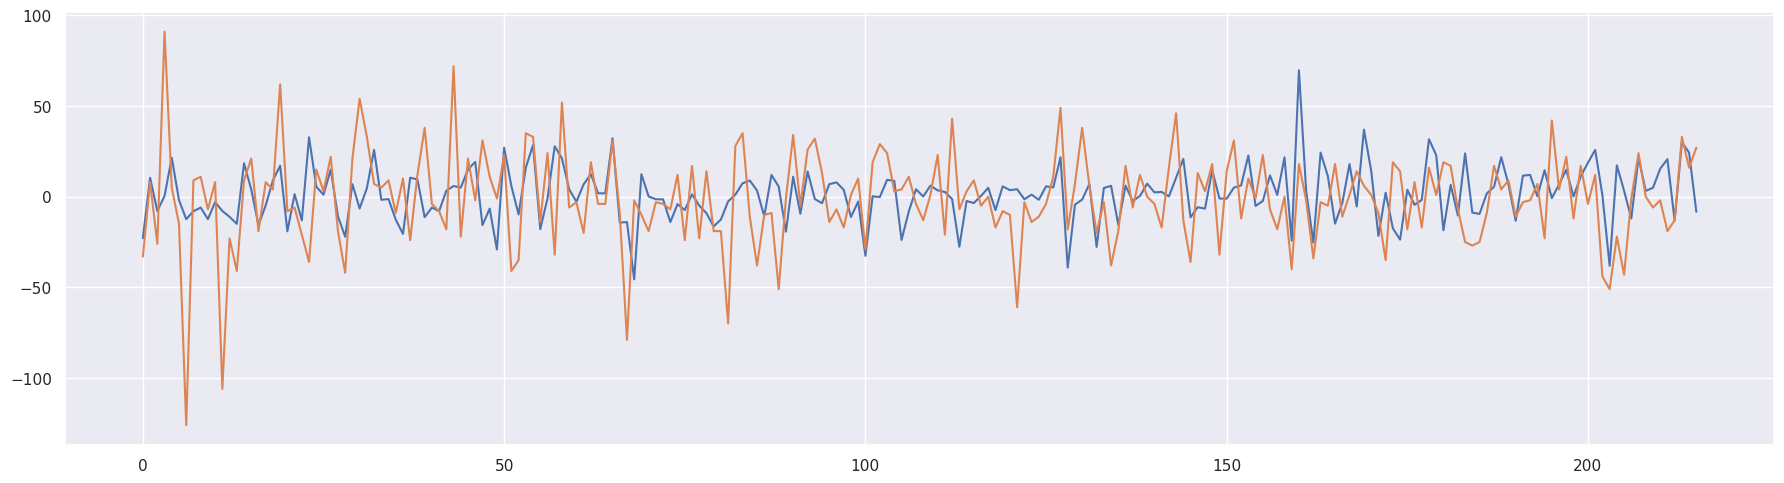

In [51]:
plt.plot(predictions)
plt.plot(test_labels.reset_index().drop(columns=['index'])['Thefts'])

In [52]:
# Now we are going to predict the following 100 points of time (days)

from datetime import datetime, timedelta

start_date = datetime(2023, 5, 14)  # Specify the starting date
future_days = 100  # Number of days in the future

date_range = pd.Series([start_date + timedelta(days=i) for i in range(future_days)])

In [53]:
# preprocessing

date_range = pd.DataFrame({'Date': date_range})
date_range['dow'] = date_range['Date'].dt.dayofweek
date_range['month'] = date_range['Date'].dt.month
date_range['year'] = date_range['Date'].dt.year
date_range['day'] = date_range['Date'].dt.day
date_range['season'] = date_range['Date'].dt.month%12 // 3 + 1
test_features = date_range.drop(columns=['Date'])

In [54]:
predictions_100 = rf.predict(test_features)

In [55]:
test_features['ID'] = predictions_100
test_features['Date'] = pd.to_datetime(test_features[['year', 'month', 'day']])

In [56]:
# We add the result to our original time series

total_time_series = time_series_diff.append([test_features.set_index('Date')['ID']])

/tmp/ipykernel_35390/3338871014.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_time_series = time_series_diff.append([test_features.set_index('Date')['ID']])


In [57]:
# We reverse the diff

x, x_diff =temp_df_without_COVID['ID'].iloc[0], total_time_series.iloc[1:]
temp_var = np.r_[x, x_diff].cumsum().astype(int)

In [58]:
total_ts = total_time_series.reset_index()
total_ts['Thefts'] = temp_var

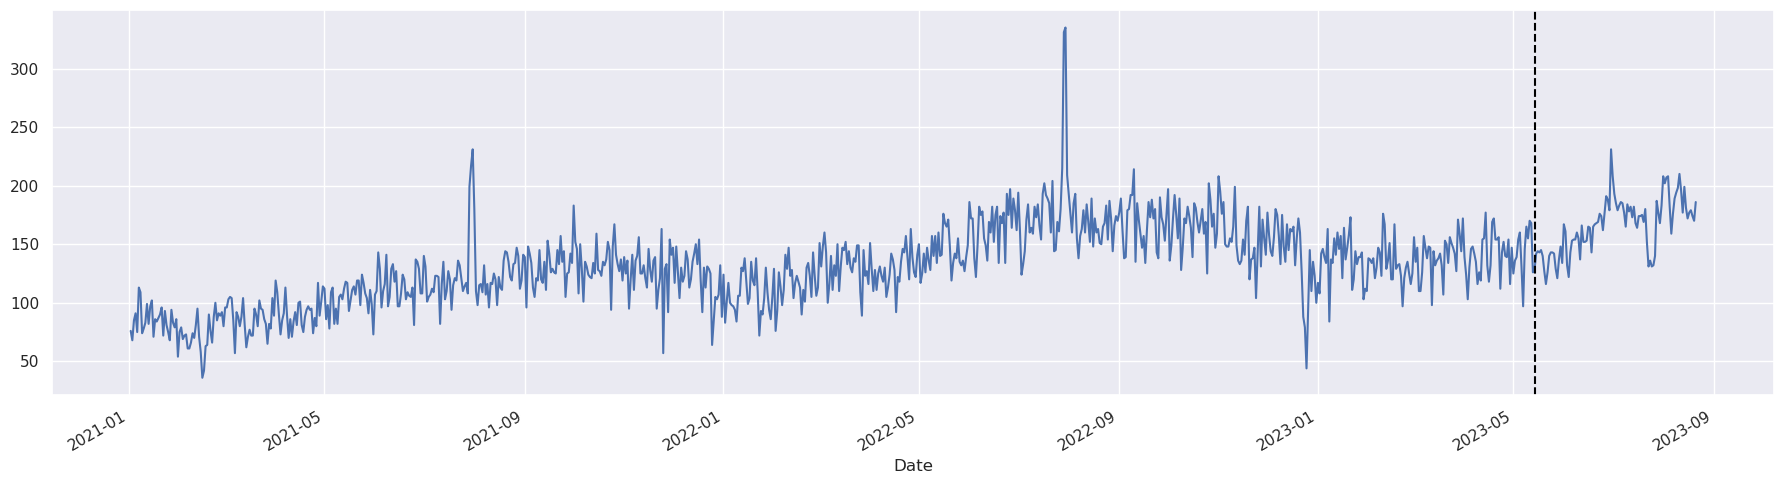

In [59]:
# Finally we print the predictions, we can see that the predictions (after 
# the dotted line)preserves the trend and seasonality plus it makes alot of sense.

total_ts[['Date', 'Thefts']].set_index('Date')['Thefts'].plot()
plt.axvline(x='2023-05-14', color='black', linestyle='--')